# Yammer Data Challenge: Customer Cliff Dive

Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory.

## Investigating a Drop in User Engagement
Yammer’s Analysts are responsible for triaging product and business problems as they come up. In many cases, these problems surface through key metric dashboards that execs and managers check daily.

## The problem

You show up to work Tuesday morning, September 2, 2014. The head of the Product team walks over to your desk and asks you what you think about the latest activity on the user engagement dashboards. You fire them up, and something immediately jumps out:

https://modeanalytics.com/modeanalytics/reports/cbb8c291ee96/runs/7925c979521e/viz/cfcdb6 b78885

The above chart shows the number of engaged users each week. Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type “engagement”). Any point in this chart can be interpreted as “the number of users who logged at least one engagement event during the week starting on that date.”

Need to determine: what caused the dip at the end of the chart shown above and, if appropriate, recommending solutions for the problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the data. There are three important csv files. 

df_users = pd.read_csv('data/yammer_users.csv')
df_events = pd.read_csv('data/yammer_events.csv')
df_emails = pd.read_csv('data/yammer_emails.csv')

In [3]:
df_events['user_id'] = df_events['user_id'].astype(int)

In [4]:
# Some features: occurred time, event types, event names, locations, devices

df_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [5]:
# change time to standard dates and weeks and add to the original Dataframe

df_events['time'] = pd.to_datetime(df_events['occurred_at']).dt.date
df_events['week'] = pd.to_datetime(df_events['occurred_at']).dt.week

In [6]:
df_events.head(30)

,user_id,occurred_at,event_type,event_name,location,device,user_type,time,week
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,18
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,18
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,18
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,18
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,18
5,10522,2014-05-02 11:03:43,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,18
6,10612,2014-05-01 09:59:46,engagement,login,Netherlands,iphone 5,1.0,2014-05-01,18
7,10612,2014-05-01 10:00:18,engagement,like_message,Netherlands,iphone 5,1.0,2014-05-01,18
8,10612,2014-05-01 10:00:53,engagement,send_message,Netherlands,iphone 5,1.0,2014-05-01,18
9,10612,2014-05-01 10:01:24,engagement,home_page,Netherlands,iphone 5,1.0,2014-05-01,18


In [7]:
# each user_id show up multiple times, group by user_id and count the duplicated numbers as counts

df_events_id = df_events.groupby('user_id').size().reset_index(name='counts')

In [8]:
df_events_id.head()

,user_id,counts
0,4,93
1,8,36
2,11,126
3,17,55
4,19,71


In [9]:
# group by dates, then devices

df_events1 = df_events.groupby(['time','device']).size().reset_index(name='counts')

In [10]:
# find different devices

print(len(df_events1['device'].unique()))
print(df_events1['device'].unique())

26
['acer aspire desktop' 'acer aspire notebook' 'amazon fire phone'
 'asus chromebook' 'dell inspiron desktop' 'dell inspiron notebook'
 'hp pavilion desktop' 'htc one' 'ipad air' 'ipad mini' 'iphone 4s'
 'iphone 5' 'iphone 5s' 'kindle fire' 'lenovo thinkpad' 'mac mini'
 'macbook air' 'macbook pro' 'nexus 10' 'nexus 5' 'nexus 7'
 'nokia lumia 635' 'samsumg galaxy tablet' 'samsung galaxy note'
 'samsung galaxy s4' 'windows surface']


In [11]:
df_events1.head()

,time,device,counts
0,2014-05-01,acer aspire desktop,39
1,2014-05-01,acer aspire notebook,68
2,2014-05-01,amazon fire phone,29
3,2014-05-01,asus chromebook,103
4,2014-05-01,dell inspiron desktop,53


In [12]:
device_list = df_events1['device'].unique() 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


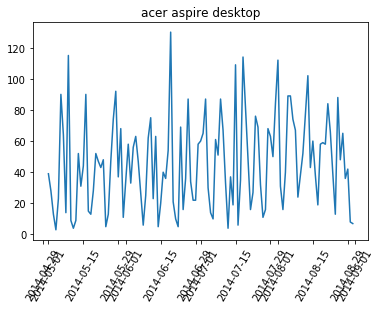

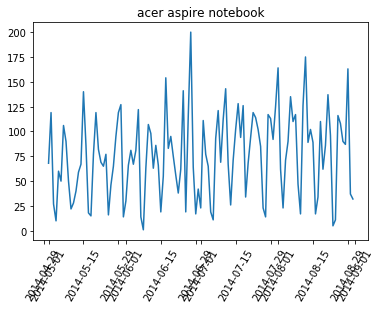

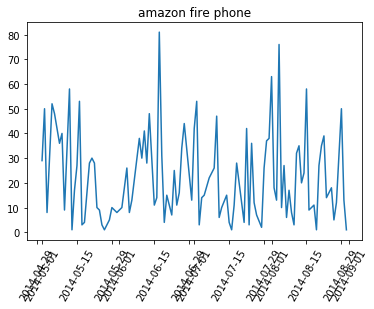

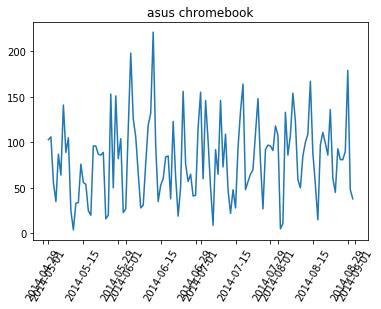

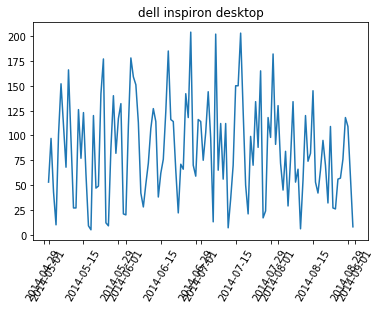

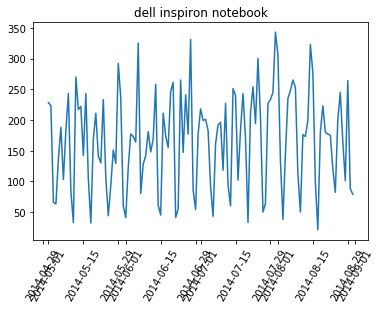

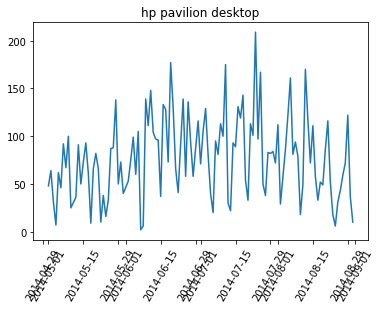

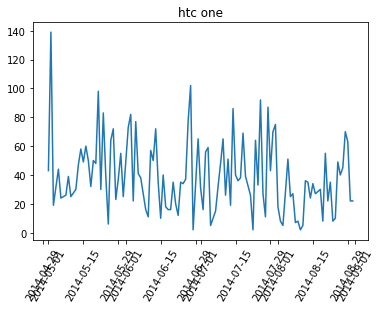

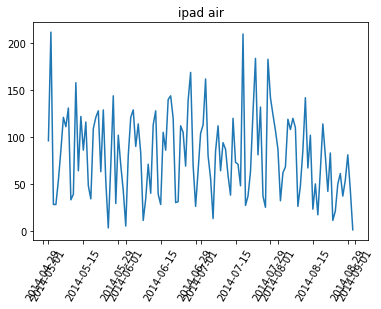

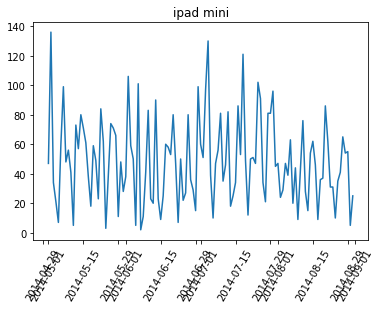

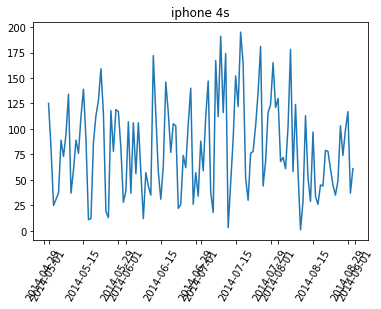

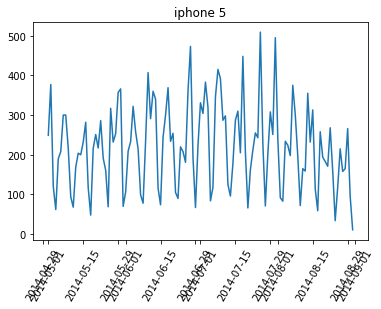

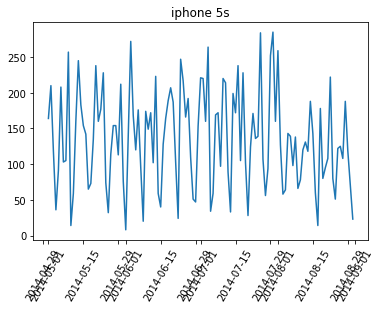

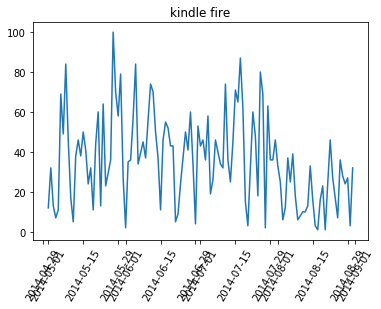

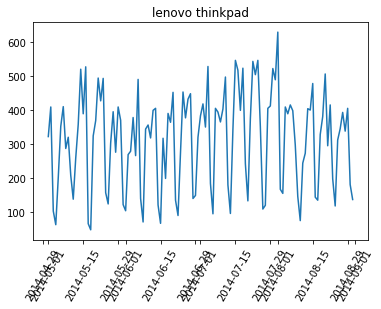

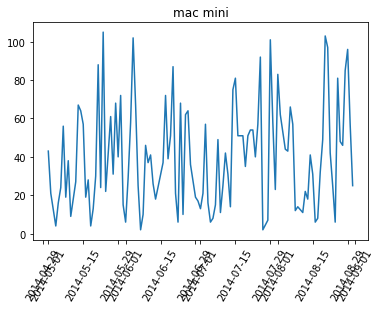

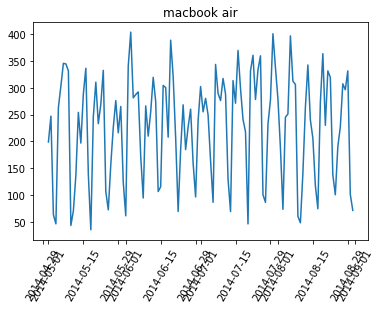

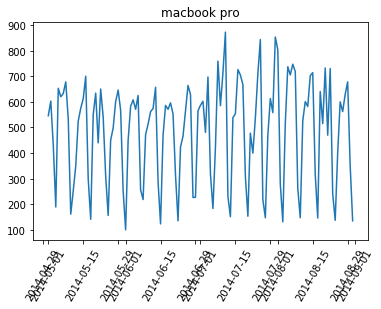

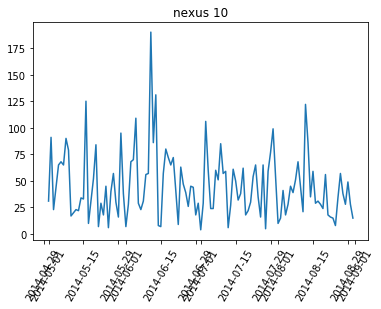

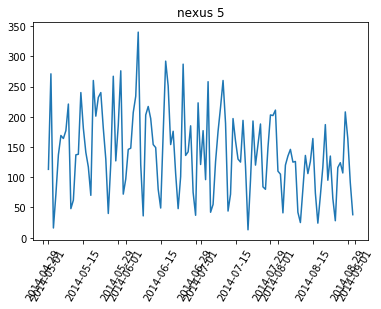

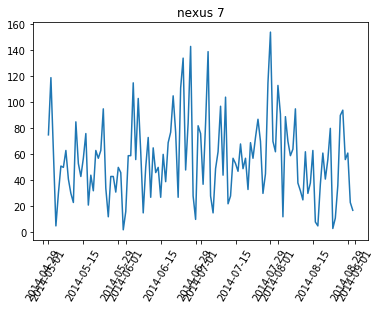

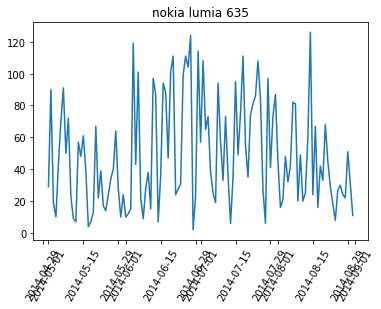

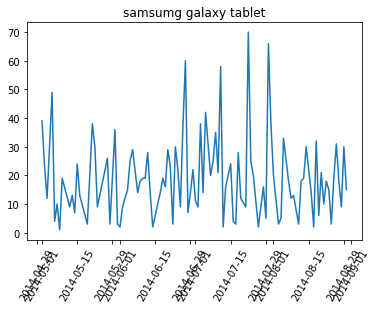

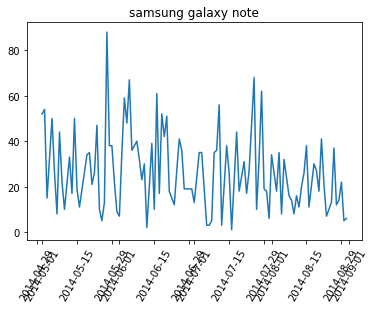

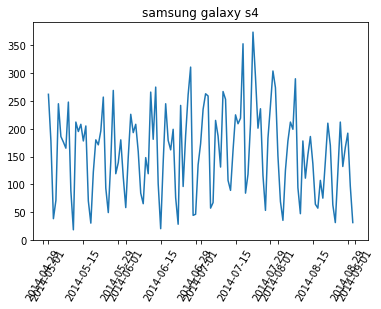

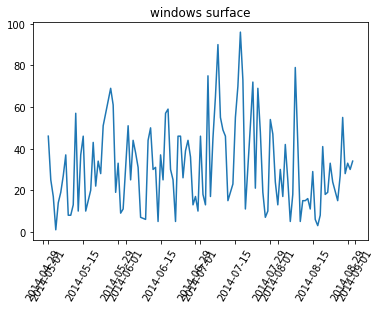

In [13]:
# For each device, show dates vs counts, the fluctuation is very big, cannot find obvious conclusions.

for i in range(0,len(device_list)):
    y = df_events1['counts'][df_events1['device']== device_list[i]]
    x = df_events1['time'][df_events1['device']== device_list[i]]
    plt.xticks(rotation=60)
    plt.title(device_list[i])
    plt.plot(x, y)
    plt.show()

In [14]:
# Then change to weeks, plot weeks vs devices

df_events3 = df_events.groupby(['week','device']).size().reset_index(name='counts')

print(len(df_events3['device'].unique()))
print(df_events3['device'].unique())

26
['acer aspire desktop' 'acer aspire notebook' 'amazon fire phone'
 'asus chromebook' 'dell inspiron desktop' 'dell inspiron notebook'
 'hp pavilion desktop' 'htc one' 'ipad air' 'ipad mini' 'iphone 4s'
 'iphone 5' 'iphone 5s' 'kindle fire' 'lenovo thinkpad' 'mac mini'
 'macbook air' 'macbook pro' 'nexus 10' 'nexus 5' 'nexus 7'
 'nokia lumia 635' 'samsumg galaxy tablet' 'samsung galaxy note'
 'samsung galaxy s4' 'windows surface']


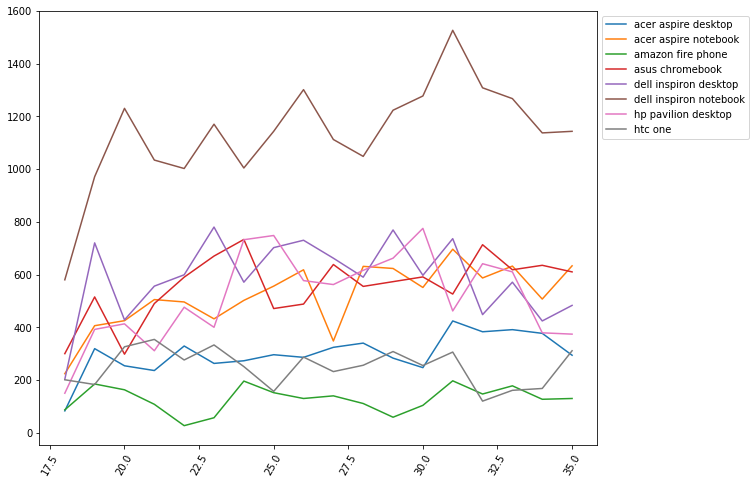

In [15]:
# We find that Dell inspiron desktop has obvious drop after 31st week

device_list = df_events3['device'].unique()

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)
legend = []

for i in range(0,int(len(device_list)/3)):
    y = df_events3['counts'][df_events3['device']== device_list[i]]
    x = df_events3['week'][df_events3['device']== device_list[i]]
    plt.xticks(rotation=60)
    legend.append(device_list[i])
    plt.plot(x, y)
    #plt.show()

plt.legend(legend,loc='upper left',bbox_to_anchor=(1, 1))

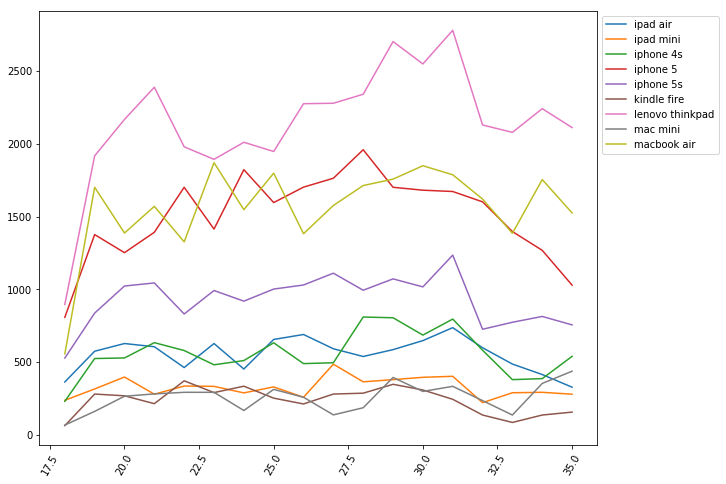

In [16]:
# We find that lenovo thinkpad, iphone 5 and macbook air has obvious drop after 31st week


device_list = df_events3['device'].unique()

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)
legend = []

for i in range(int(len(device_list)/3),int(2 * len(device_list)/3)):
    y = df_events3['counts'][df_events3['device']== device_list[i]]
    x = df_events3['week'][df_events3['device']== device_list[i]]
    plt.xticks(rotation=60)
    #plt.title(device_list[i])
    legend.append(device_list[i])
    plt.plot(x, y)
    #plt.show()

plt.legend(legend,loc='upper left',bbox_to_anchor=(1, 1))

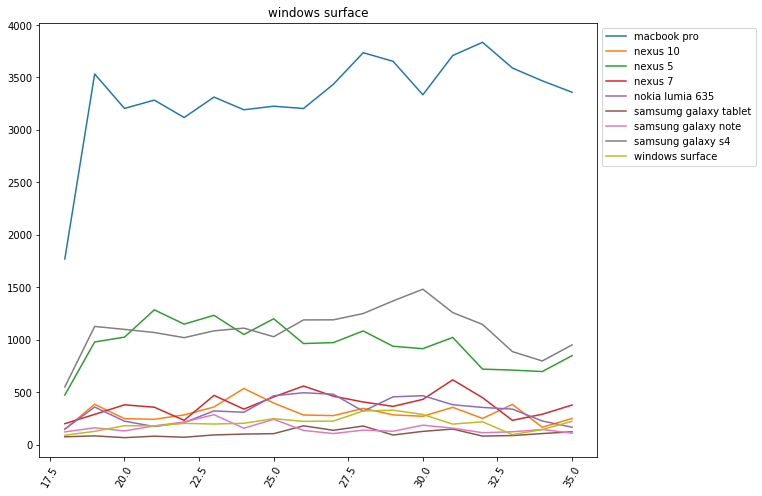

In [17]:
# Mac pro also drops a bit.

device_list = df_events3['device'].unique()

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)
legend = []

for i in range(int(2 * len(device_list)/3),len(device_list)):
    y = df_events3['counts'][df_events3['device']== device_list[i]]
    x = df_events3['week'][df_events3['device']== device_list[i]]
    plt.xticks(rotation=60)
    plt.title(device_list[i])
    legend.append(device_list[i])
    plt.plot(x, y)
    #plt.show()
plt.legend(legend,loc='upper left',bbox_to_anchor=(1, 1))

In [18]:
# Now check time vs event names

df_events2 = df_events.groupby(['time','event_name']).size().reset_index(name='counts')

In [19]:
df_events2

,time,event_name,counts
0,2014-05-01,complete_signup,34
1,2014-05-01,create_user,73
2,2014-05-01,enter_email,43
3,2014-05-01,enter_info,37
4,2014-05-01,home_page,832
5,2014-05-01,like_message,539
6,2014-05-01,login,333
7,2014-05-01,search_autocomplete,149
8,2014-05-01,search_click_result_1,16
9,2014-05-01,search_click_result_10,7


In [20]:
print(len(df_events2['event_name'].unique()))
print(df_events2['event_name'].unique())

21
['complete_signup' 'create_user' 'enter_email' 'enter_info' 'home_page'
 'like_message' 'login' 'search_autocomplete' 'search_click_result_1'
 'search_click_result_10' 'search_click_result_2' 'search_click_result_3'
 'search_click_result_4' 'search_click_result_5' 'search_click_result_6'
 'search_click_result_7' 'search_click_result_8' 'search_click_result_9'
 'search_run' 'send_message' 'view_inbox']


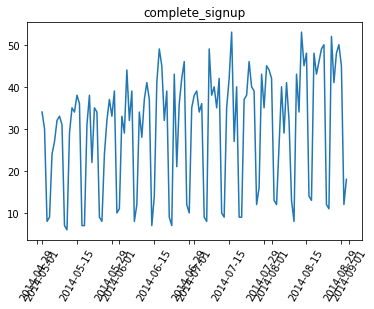

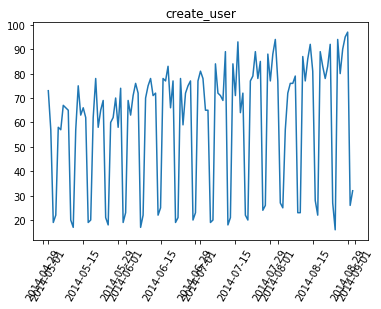

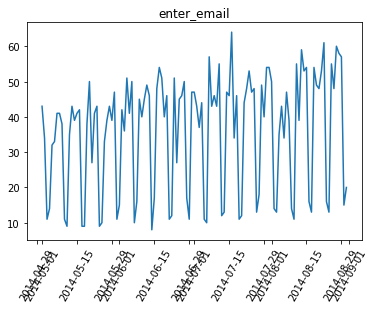

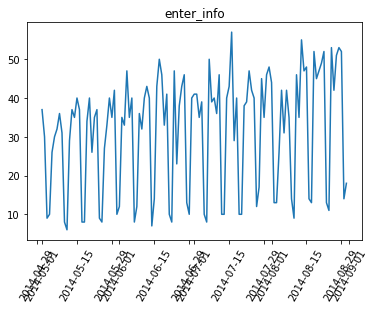

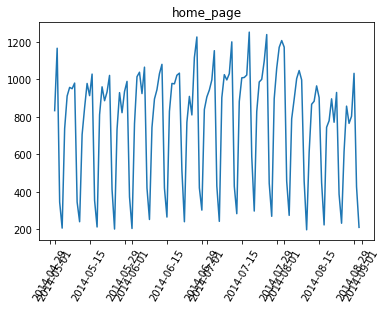

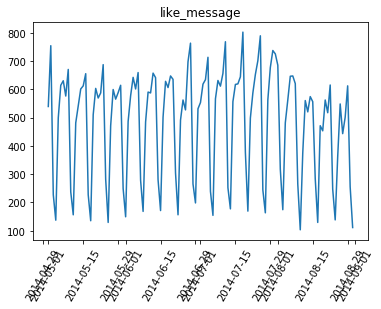

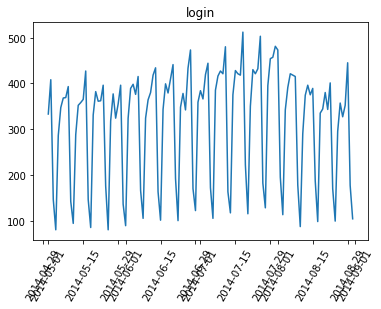

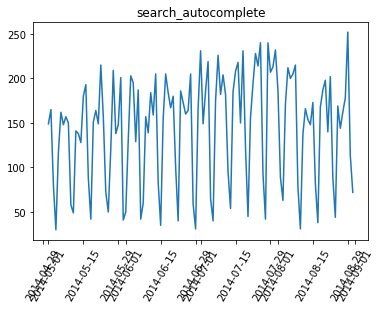

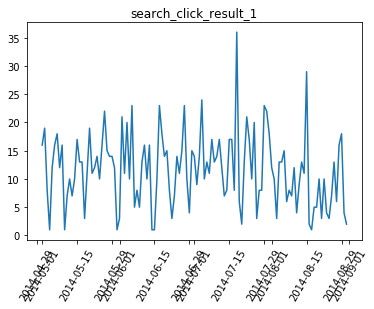

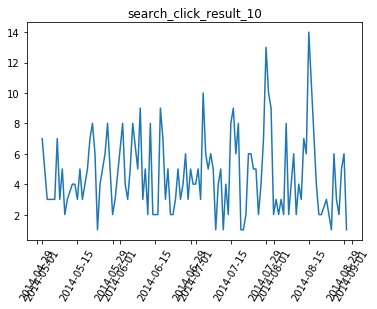

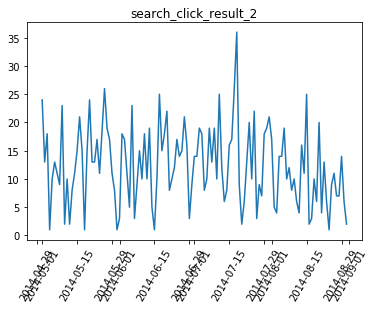

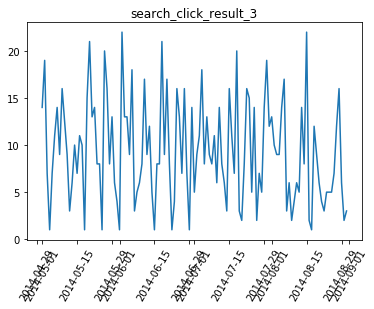

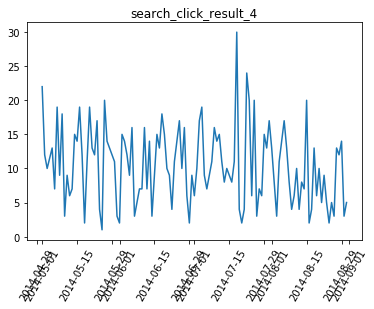

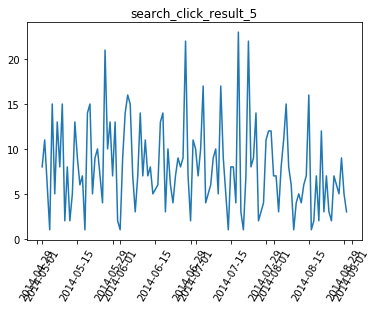

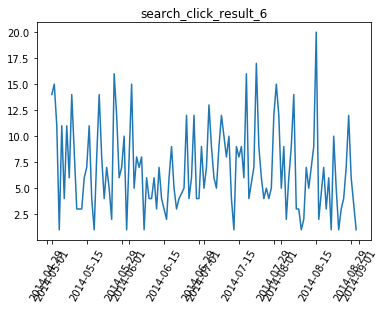

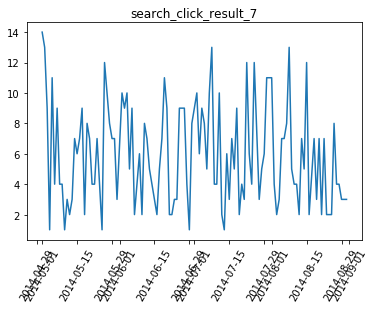

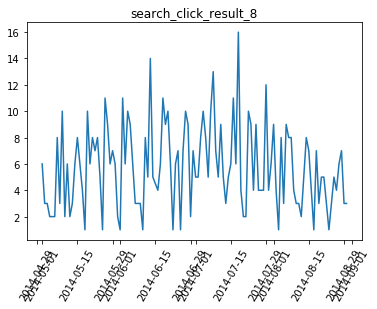

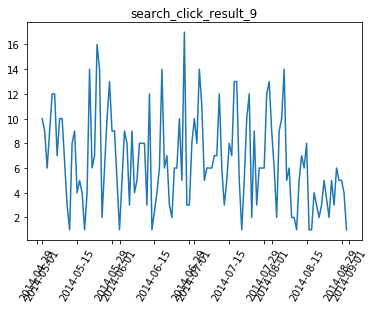

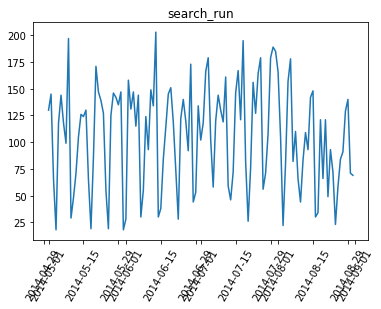

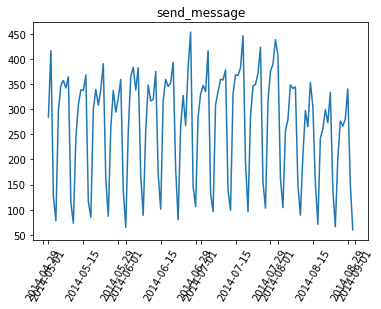

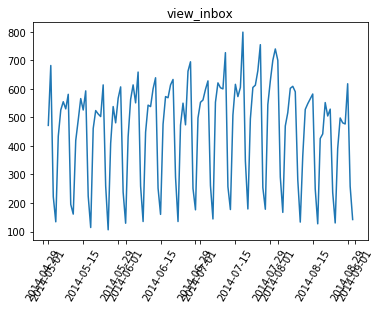

In [21]:
# check dates vs event name, hard to get conclusions

eventname_list = df_events2['event_name'].unique() 

for i in range(0,len(eventname_list)):
    y = df_events2['counts'][df_events2['event_name']== eventname_list[i]]
    x = df_events2['time'][df_events2['event_name']== eventname_list[i]]
    plt.xticks(rotation=60)
    plt.title(eventname_list[i])
    plt.plot(x, y)
    plt.show()

21
['complete_signup' 'create_user' 'enter_email' 'enter_info' 'home_page'
 'like_message' 'login' 'search_autocomplete' 'search_click_result_1'
 'search_click_result_10' 'search_click_result_2' 'search_click_result_3'
 'search_click_result_4' 'search_click_result_5' 'search_click_result_6'
 'search_click_result_7' 'search_click_result_8' 'search_click_result_9'
 'search_run' 'send_message' 'view_inbox']


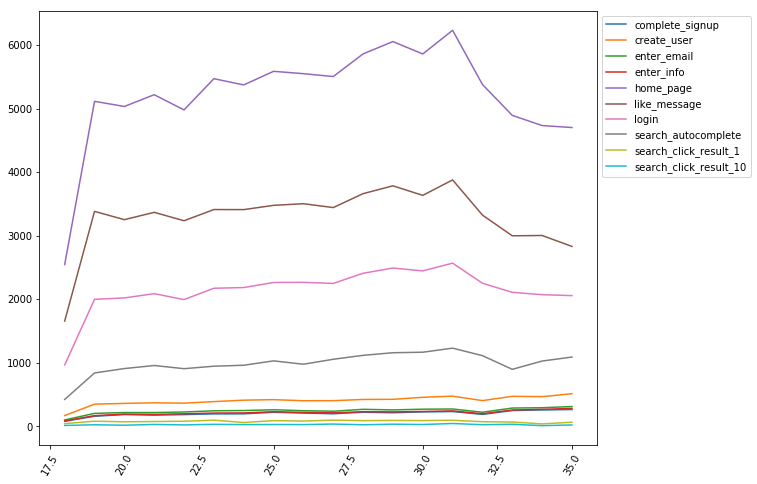

In [22]:
# Homepage is the most important one

df_events4 = df_events.groupby(['week','event_name']).size().reset_index(name='counts')

print(len(df_events4['event_name'].unique()))
print(df_events4['event_name'].unique())


eventname_list = df_events4['event_name'].unique() 

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)
legend = []
for i in range(0,int(len(eventname_list)/2)):
    y = df_events4['counts'][df_events4['event_name']== eventname_list[i]]
    x = df_events4['week'][df_events4['event_name']== eventname_list[i]]
    plt.xticks(rotation=60)
    legend.append(eventname_list[i])
    plt.plot(x, y)
    #plt.show()
plt.legend(legend,loc='upper left',bbox_to_anchor=(1, 1))

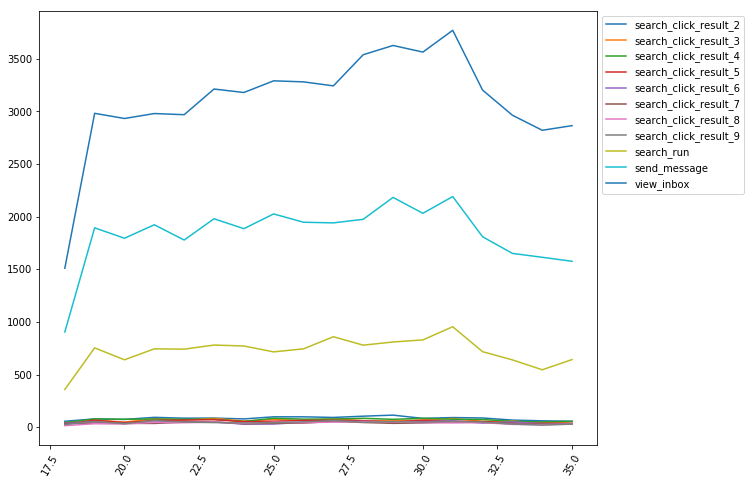

In [23]:
# Also view_inbox

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)
legend = []
for i in range(int(len(eventname_list)/2), len(eventname_list)):
    y = df_events4['counts'][df_events4['event_name']== eventname_list[i]]
    x = df_events4['week'][df_events4['event_name']== eventname_list[i]]
    plt.xticks(rotation=60)
    legend.append(eventname_list[i])
    plt.plot(x, y)
    #plt.show()
plt.legend(legend,loc='upper left',bbox_to_anchor=(1, 1))

In [24]:
df_events_location = df_events.groupby('location').size().reset_index(name='counts')

In [25]:
df_events_location

,location,counts
0,Argentina,1717
1,Australia,7494
2,Austria,2494
3,Belgium,2822
4,Brazil,11240
5,Canada,9126
6,Chile,1092
7,Colombia,1945
8,Denmark,2191
9,Egypt,2258
